In [4]:
import ml_utils as mt 
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,ExtraTreesClassifier,ExtraTreesRegressor,GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt 
from sklearn.model_selection import RandomizedSearchCV


Gradient Boost Classifier

In [7]:
ld_train=pd.read_csv('./bd_train.csv')

def children_to_num(col):
    
    num_col=col.str.replace('Zero','0')
    num_col=num_col.str.replace('4+','4',regex=False)
    num_col=pd.to_numeric(num_col,errors='coerce')
    
    return num_col

def ab_to_num(col):
    
    col=col.str.replace('71+','71-71',regex=False)
    k=col.str.split('-',expand=True)
    
    for i in [0,1]:
        k[i]=pd.to_numeric(k[i],errors='coerce')
        
    num_col=0.5*(k[0]+k[1])
    
    return num_col

def fi_to_num(col):
    
    col=col.replace({'<10,000, >= 8,000':9000, '>=35,000':35000, '<25,000, >=22,500':23750,
       '<20,000, >=17,500':18750, '<12,500, >=10,000':11250, '<30,000, >=27,500':28750,
       '<27,500, >=25,000':26250, '<17,500, >=15,000':16250, '<15,000, >=12,500':13750,
       '<22,500, >=20,000':21250,'< 4,000': 4000, '< 8,000, >= 4,000':6000})
    num_col=pd.to_numeric(col,errors='coerce')
    
    return num_col

simple_numeric_cols=['year_last_moved','Average.Credit.Card.Transaction', 'Balance.Transfer',
      'Term.Deposit', 'Life.Insurance', 'Medical.Insurance',
      'Average.A.C.Balance', 'Personal.Loan', 'Investment.in.Mutual.Fund',
      'Investment.Tax.Saving.Bond', 'Home.Loan', 'Online.Purchase.Amount','Investment.in.Commudity',
      'Investment.in.Equity', 'Investment.in.Derivative',
      'Portfolio.Balance']

cat_to_dummies_cols=['status' , 'occupation' , 'occupation_partner' , 'home_status', 'self_employed',
'self_employed_partner','TVarea','gender','region']

custom_function_cols={'children':children_to_num,'age_band':ab_to_num,'family_income':fi_to_num}
ld_pipe=mt.DataPipe(simple_num=simple_numeric_cols,
                     cat_to_dummies=cat_to_dummies_cols,
                     custom_func_dict=custom_function_cols)
ld_pipe.fit(ld_train)
x_train=ld_pipe.transform(ld_train)
y_train=(ld_train['Revenue.Grid']==1).astype(int)

C:\Users\HP\Desktop\Ml\ml_utils.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col]=self.col_func_dict[col](x[col])
C:\Users\HP\Desktop\Ml\ml_utils.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col]=self.col_func_dict[col](x[col])


In [9]:
params_gbm={
        'n_estimators':[50,100,150,200,250,300], # 6
        'max_features':[2,5,10,15,20,30,40,48],  # 7
        'max_depth':[None,5,6,7,8,10], # 10
        'min_samples_leaf':[1,2,5,10,15,20], # 6
        'min_samples_split':[2,5,10,15,20] ,# 5
        'learning_rate':[0.01,0.1,0.5,1.0], # 4
        'subsample':[0.5,0.75,1.0] # 3
}

In [11]:
reg_gbm=GradientBoostingClassifier()

In [13]:
rs_gbm=RandomizedSearchCV(reg_gbm,
                        cv=10,
                        param_distributions=params_gbm,
                        scoring='neg_mean_absolute_error',
                        n_iter=50,
                        n_jobs=-1,
                        verbose=20)

In [15]:
rs_gbm.fit(x_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5, 1.0],
                                        'max_depth': [None, 5, 6, 7, 8, 10],
                                        'max_features': [2, 5, 10, 15, 20, 30,
                                                         40, 48],
                                        'min_samples_leaf': [1, 2, 5, 10, 15,
                                                             20],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300],
                                        'subsample': [0.5, 0.75, 1.0]},
                   scoring='neg_mean_absolute_error', verbose=20)

In [16]:
mt.report(rs_gbm.cv_results_,5)

Model with rank: 1
Mean validation score: -0.028682 (std: 0.005989)
Parameters: {'subsample': 0.75, 'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 20, 'max_features': 48, 'max_depth': 8, 'learning_rate': 0.1}

Model with rank: 2
Mean validation score: -0.029175 (std: 0.005058)
Parameters: {'subsample': 1.0, 'n_estimators': 250, 'min_samples_split': 20, 'min_samples_leaf': 20, 'max_features': 15, 'max_depth': 10, 'learning_rate': 0.1}

Model with rank: 3
Mean validation score: -0.030037 (std: 0.007585)
Parameters: {'subsample': 1.0, 'n_estimators': 250, 'min_samples_split': 20, 'min_samples_leaf': 20, 'max_features': 30, 'max_depth': None, 'learning_rate': 0.5}

Model with rank: 4
Mean validation score: -0.030159 (std: 0.004720)
Parameters: {'subsample': 0.75, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 15, 'max_features': 48, 'max_depth': 10, 'learning_rate': 0.1}

Model with rank: 5
Mean validation score: -0.030530 (std: 0.006969)
Parameters: {'s

In [17]:
reg_gbm=GradientBoostingClassifier(**rs_gbm.best_params_)

In [19]:
reg_gbm.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=8, max_features=48, min_samples_leaf=20,
                           n_estimators=250, subsample=0.75)

In [20]:
feat_imp_df=pd.DataFrame({'feature':x_train.columns,'importance':reg_gbm.feature_importances_})

In [21]:
feat_imp_df.sort_values('importance',ascending=False,inplace=True)
feat_imp_df['cum_importance']=feat_imp_df['importance'].cumsum()
feat_imp_df

,feature,importance,cum_importance
63,Online.Purchase.Amount,0.353211,0.353211
61,Investment.Tax.Saving.Bond,0.091484,0.444696
53,Average.Credit.Card.Transaction,0.084968,0.529664
56,Life.Insurance,0.078004,0.607668
55,Term.Deposit,0.066720,0.674388
...,...,...,...
19,occupation_partner_Other,0.000000,1.000000
22,home_status_Rent Privately,0.000000,1.000000
23,home_status_Live in Parental Hom,0.000000,1.000000
51,region_Northern Ireland,0.000000,1.000000


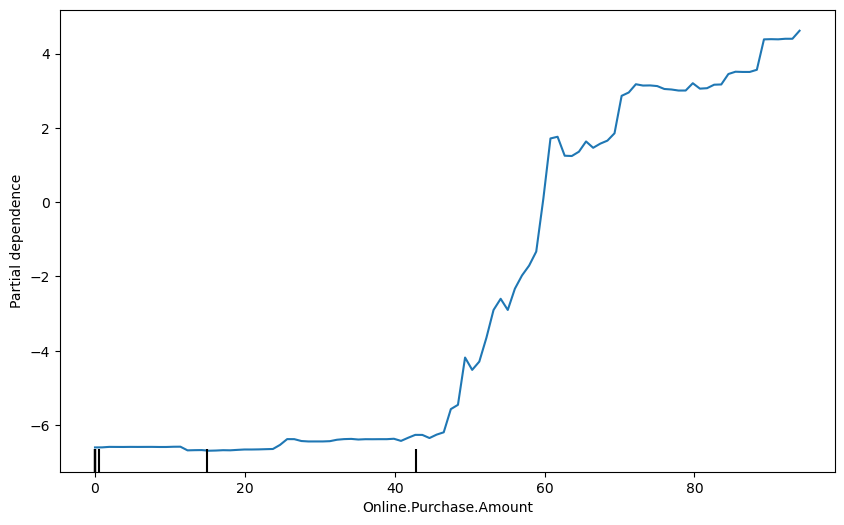

In [22]:
feature_to_plot=['Online.Purchase.Amount']

fig,ax=plt.subplots(figsize=(10,6))
PartialDependenceDisplay.from_estimator(reg_gbm,x_train,feature_to_plot,ax=ax,kind='average')
plt.show()

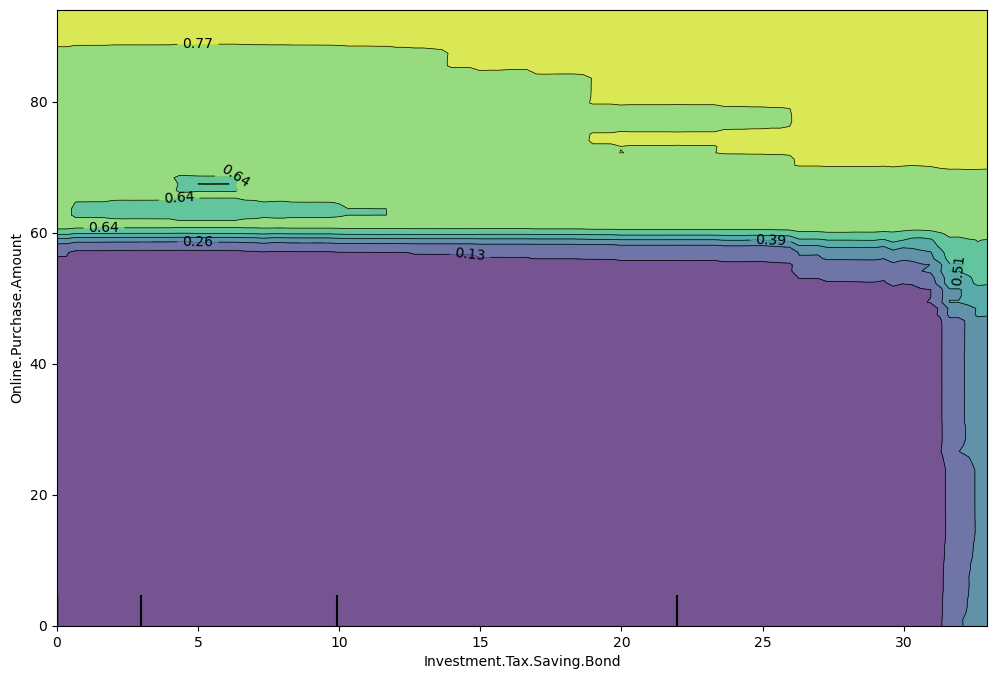

In [23]:
features = [('Investment.Tax.Saving.Bond', 'Online.Purchase.Amount')]  # Replace with actual column names

fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(rs_gbm, x_train, features, ax=ax, kind="average")
plt.show()